In [2]:
%matplotlib inline


# OT with Laplacian regularization for domain adaptation

This example introduces a domain adaptation in a 2D setting and OTDA
approach with Laplacian regularization.


In [1]:
# Authors: Ievgen Redko <ievgen.redko@univ-st-etienne.fr>

# License: MIT License

import matplotlib.pylab as pl
import ot

## Generate data



In [3]:
n_source_samples = 150
n_target_samples = 150

Xs, ys = ot.datasets.make_data_classif('3gauss', n_source_samples)
Xt, yt = ot.datasets.make_data_classif('3gauss2', n_target_samples)

## Instantiate the different transport algorithms and fit them



In [4]:
# EMD Transport
ot_emd = ot.da.EMDTransport()
ot_emd.fit(Xs=Xs, Xt=Xt)

# Sinkhorn Transport
ot_sinkhorn = ot.da.SinkhornTransport(reg_e=.01)
ot_sinkhorn.fit(Xs=Xs, Xt=Xt)

# EMD Transport with Laplacian regularization
ot_emd_laplace = ot.da.EMDLaplaceTransport(reg_lap=100, reg_src=1)
ot_emd_laplace.fit(Xs=Xs, Xt=Xt)

# transport source samples onto target samples
transp_Xs_emd = ot_emd.transform(Xs=Xs)
transp_Xs_sinkhorn = ot_sinkhorn.transform(Xs=Xs)
transp_Xs_emd_laplace = ot_emd_laplace.transform(Xs=Xs)

/Users/theoalegretti/miniforge3/envs/work/lib/python3.10/site-packages/ot/bregman.py:535: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


## Fig 1 : plots source and target samples



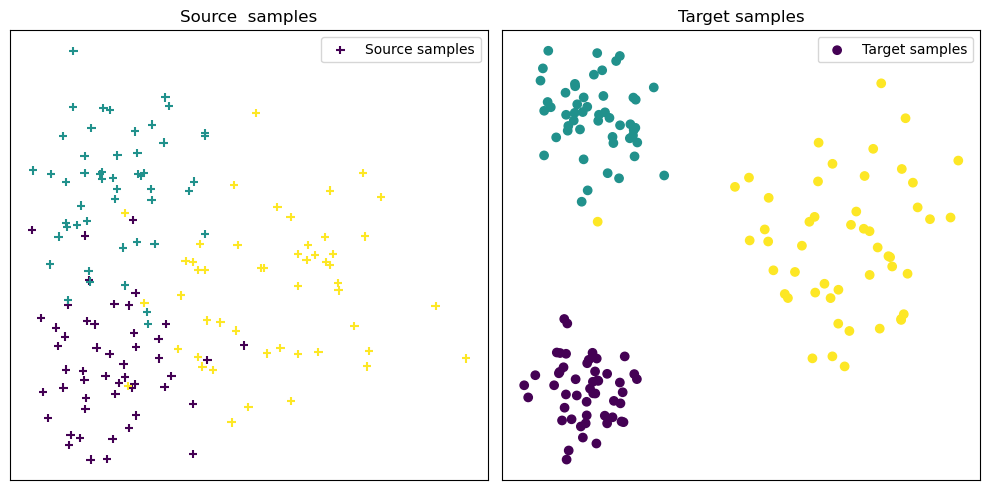

In [5]:
pl.figure(1, figsize=(10, 5))
pl.subplot(1, 2, 1)
pl.scatter(Xs[:, 0], Xs[:, 1], c=ys, marker='+', label='Source samples')
pl.xticks([])
pl.yticks([])
pl.legend(loc=0)
pl.title('Source  samples')

pl.subplot(1, 2, 2)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Target samples')
pl.xticks([])
pl.yticks([])
pl.legend(loc=0)
pl.title('Target samples')
pl.tight_layout()

## Fig 2 : plot optimal couplings and transported samples



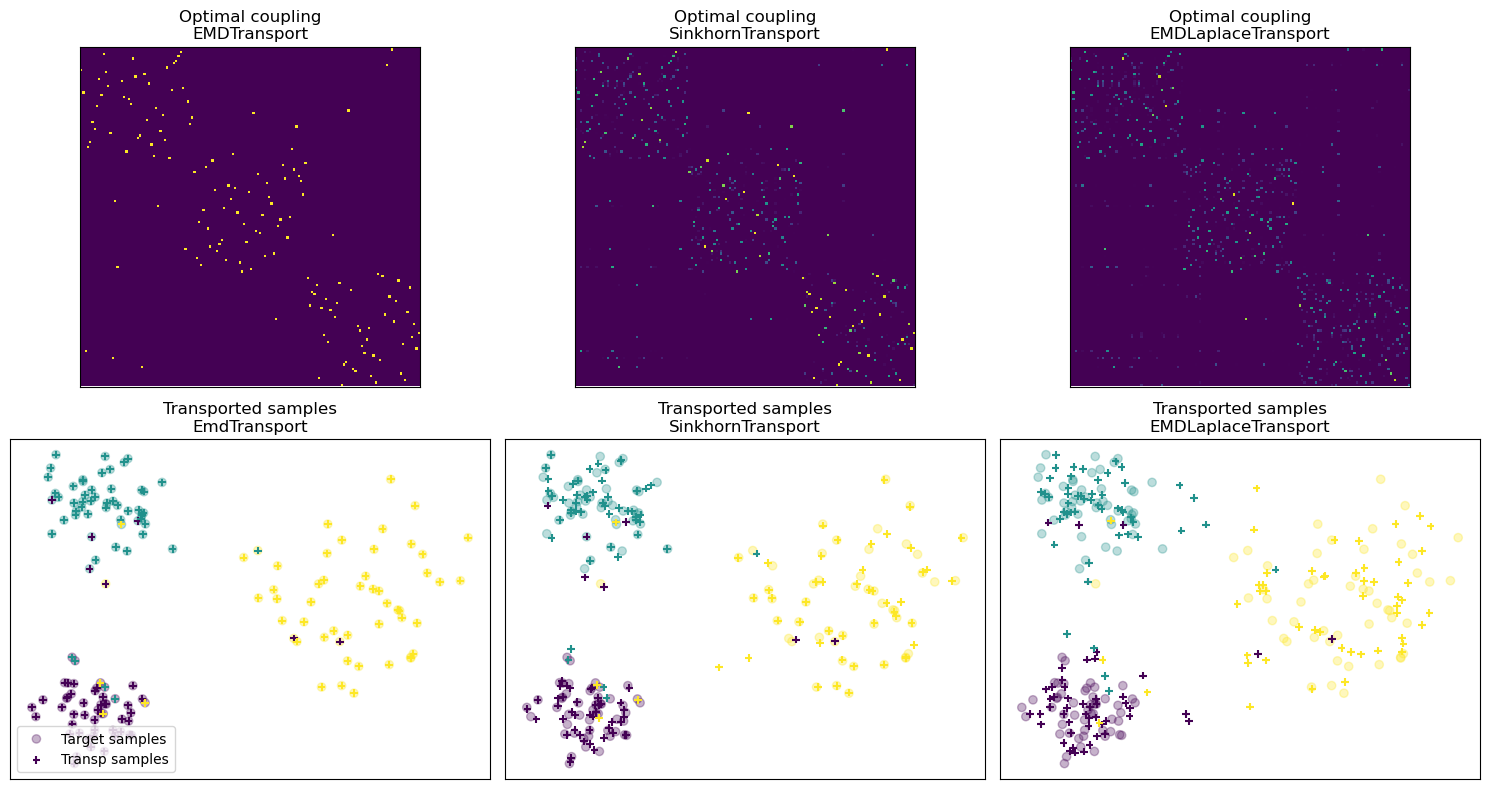

In [6]:
param_img = {'interpolation': 'nearest'}

pl.figure(2, figsize=(15, 8))
pl.subplot(2, 3, 1)
pl.imshow(ot_emd.coupling_, **param_img)
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nEMDTransport')

pl.figure(2, figsize=(15, 8))
pl.subplot(2, 3, 2)
pl.imshow(ot_sinkhorn.coupling_, **param_img)
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nSinkhornTransport')

pl.subplot(2, 3, 3)
pl.imshow(ot_emd_laplace.coupling_, **param_img)
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nEMDLaplaceTransport')

pl.subplot(2, 3, 4)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.3)
pl.scatter(transp_Xs_emd[:, 0], transp_Xs_emd[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nEmdTransport')
pl.legend(loc="lower left")

pl.subplot(2, 3, 5)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.3)
pl.scatter(transp_Xs_sinkhorn[:, 0], transp_Xs_sinkhorn[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nSinkhornTransport')

pl.subplot(2, 3, 6)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.3)
pl.scatter(transp_Xs_emd_laplace[:, 0], transp_Xs_emd_laplace[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nEMDLaplaceTransport')
pl.tight_layout()

pl.show()